# REGRESSION PROJECT


## Store Sales Prediction

## Hypothesis and Research Questions





* Null Hypothesis: Promotions have no significant effect on product sales.
* Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional periods.

Research questions: 
1)	What is the effect of seasonal variations (e.g., Monthly, or quarterly patterns) on total sales?
2)	What store is the highest performer in terms of sales?
3)	What are the best-selling products per location?
4)	Does store size affect total sales?
5)	Which days have the most sales?

## Installations and Imports

In [128]:
#%pip install seaborn 
#%pip install scikit-learn
#pip install plotly
#pip install --upgrade nbformat
#pip install missingno
#pip install statsmodels
#%pip install pmdarima


In [2]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from scipy import stats
from scipy.stats import boxcox
from pmdarima import auto_arima

## Data Preparation
Before applying machine learning to time sereis data, it is crucial to preprocess and prepare the data. This may include handling missing values, dealing with outliers, and ensuring that the data is appropriately sampled or resampled if necessary. Time series data often requires specific preprocessing steps like differencing, seasonality removal, or decomposition. 

### Read, Clean, Merge, and Perform Univariate and Bivariate Analysis

In [3]:
# import oil.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype


oil=pd.read_csv('oil.csv', parse_dates=['date'])

oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [4]:
# rename column 'dcoilwtico' to oil_price for easy reference

oil.rename(columns={'dcoilwtico':'oil_prices'}, inplace=True)
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   oil_prices  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [5]:
# import holidays_events.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

holidays_eve=pd.read_csv('holidays_events.csv', parse_dates=['date'])
holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


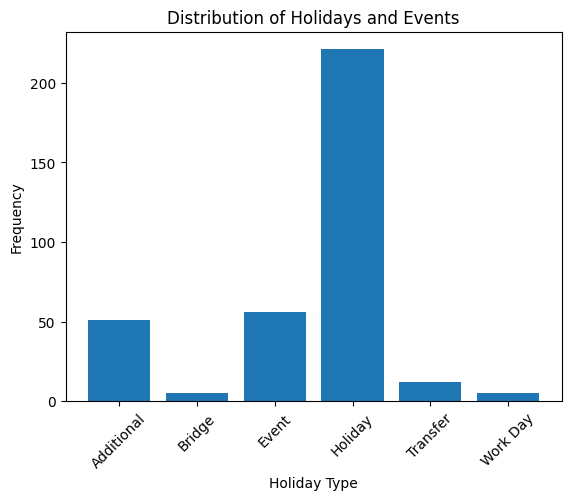

In [6]:
# create a bar plot visualization of the holidays event dataset

# Grouping by 'type' and counting occurrences of each 'locale'
locale_counts = holidays_eve.groupby('type')['locale'].count()

plt.bar(locale_counts.index, locale_counts.values)
plt.xlabel('Holiday Type')
plt.ylabel('Frequency')
plt.title('Distribution of Holidays and Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [7]:
holidays_eve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [8]:
# import stores.csv with a pd.read_csv
# and display columns, Non-Null, and datatype with .info()


stores=pd.read_csv('stores.csv')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


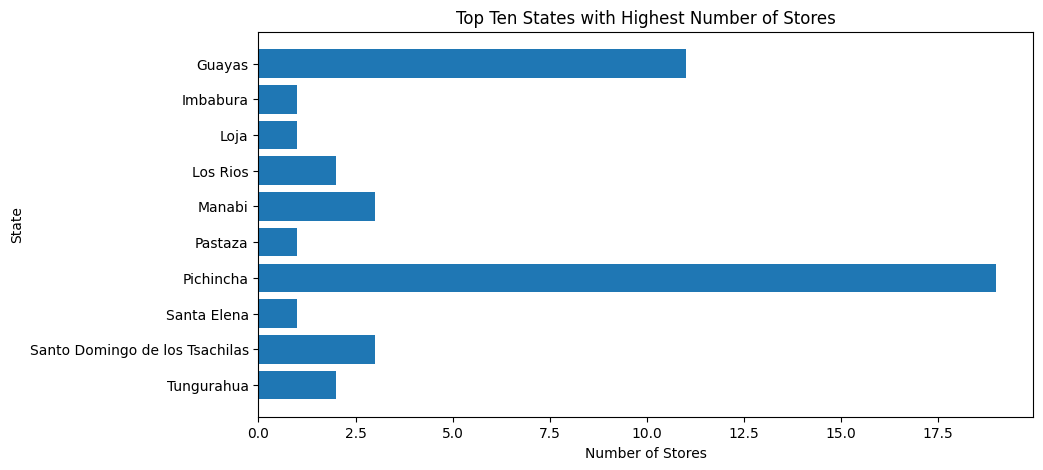

In [9]:
# Visualize the Top ten states with highest number of stores
# Grouping by state and counting the number of stores
state_counts = stores.groupby('state')['store_nbr'].count()

grouped_state_counts = state_counts.sort_index(ascending=False)

# Selecting the top ten states
top_ten_states = grouped_state_counts.head(10)

# Creating a horizontal bar plot for top ten states
plt.figure(figsize=(10, 5))
plt.barh(top_ten_states.index, top_ten_states.values)
plt.ylabel('State')
plt.xlabel('Number of Stores')
plt.title('Top Ten States with Highest Number of Stores')
plt.show()

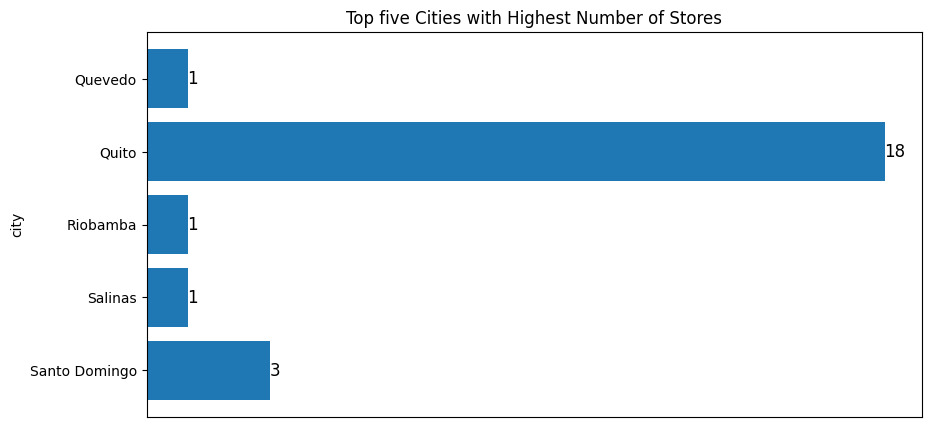

In [10]:
# Visualize the tope five cities with highest number of stores
# Grouping by state and counting the number of stores

city_counts = stores.groupby('city')['store_nbr'].count()

grouped_city_counts = city_counts.sort_index(ascending=False)

# Selecting the top ten states
top_five_city = grouped_city_counts.head()

# Creating a horizontal bar plot for top ten states
plt.figure(figsize=(10, 5))
plt.barh(top_five_city.index, top_five_city.values)
plt.ylabel('city')
plt.xlabel('Number of Stores')
plt.title('Top five Cities with Highest Number of Stores')

# Adding data values on each bar
for index, value in enumerate(top_five_city.values):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black')

# Remove the x-axis
plt.gca().axes.get_xaxis().set_visible(False)

plt.show()


In [11]:
# import transactions.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

transactions=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\Regression_Project\Datasets\transactions.csv', parse_dates=['date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [12]:
# Visualize distribution of transactions per store

# Grouping by store_nbr and summing the transactions
transactions_grouped = transactions.groupby('store_nbr')['transactions'].sum()
# Series contains the sum of transactions for each store number. 
# Sorting the results in descending order based on the sum of transactions
transactions_sorted = transactions_grouped.sort_values(ascending=False)
#Top five stores with highest transactions
top_five_stores = transactions_sorted.head(5)

top_five_stores

store_nbr
44    7273093
47    6535810
45    6201115
46    5990113
3     5366350
Name: transactions, dtype: int64

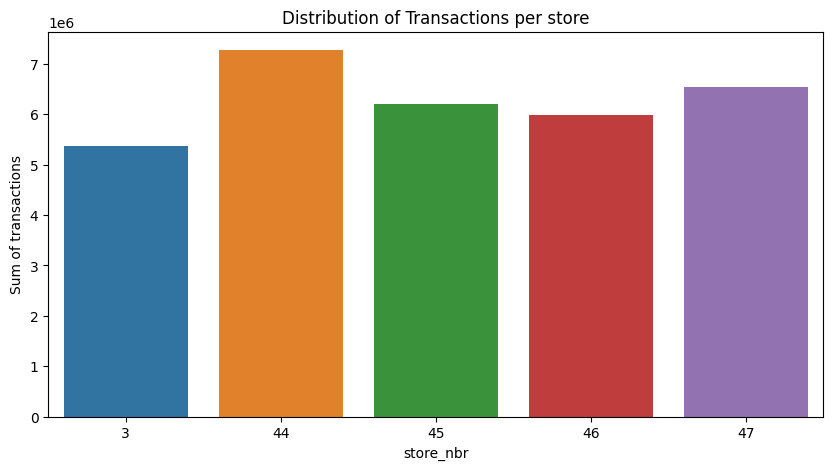

In [13]:
plt.figure(figsize=(10,5))
plt.xlabel('store number')
plt.ylabel('Sum of transactions')
plt.title('Distribution of Transactions per store')
sns.barplot(x=top_five_stores.index, y=top_five_stores.values)
plt.show()

In [14]:
# import test.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

test=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\Regression_Project\Datasets\test.csv', parse_dates=['date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [15]:
# import train.csv with a pd.read_csv
# display columns, Non-Null, and datatype with .info()
# and parse_dates to change the 'date' column from object to datetime dtype

train=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_LP3\train.csv', parse_dates=['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB



Check date ranges of imported datasets

In [16]:
# check range of dates for oil.csv

oil['date'].min(), oil['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

<Axes: >

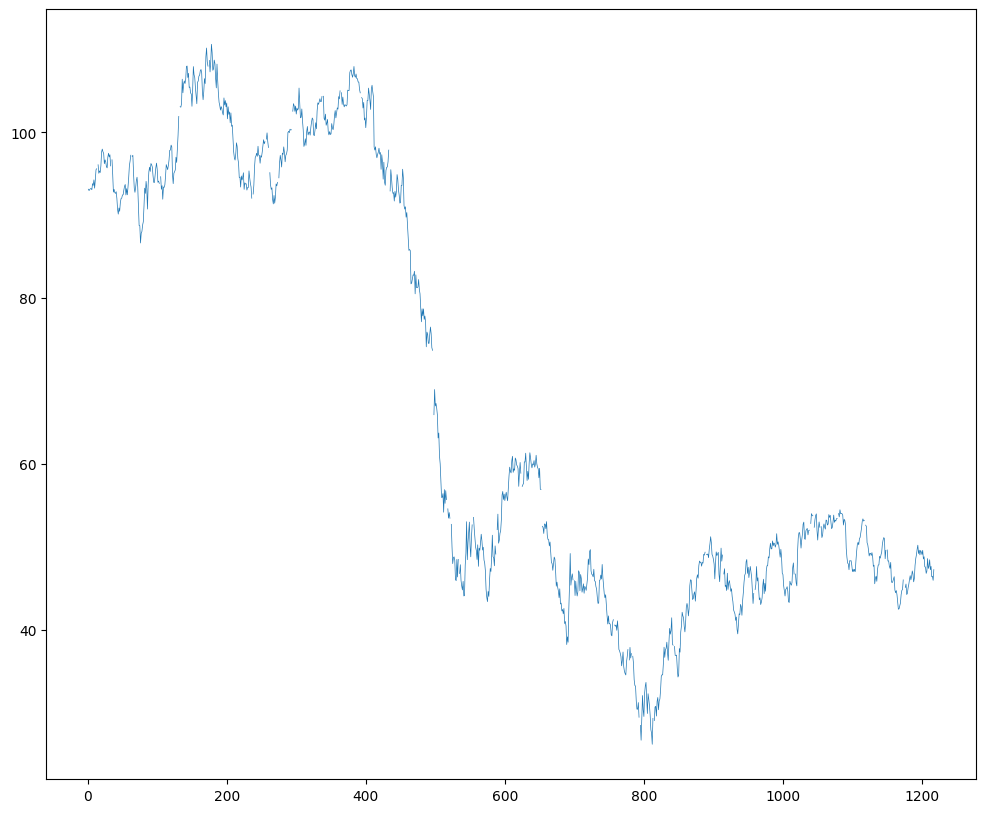

In [17]:
# visualize oil data

plt.figure(figsize=(12,10))
oil['oil_prices'].plot(linewidth=0.5)

In [18]:
#visualize oil prices with a date slider for close observation

fig = px.line(oil,x='date', y='oil_prices', title='Daily Crude Oil Prices from 2013 to 2017')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [20]:
# check range of dates for test.csv

test['date'].min(), test['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [21]:
# check range of dates for train.csv

train['date'].min(), train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [23]:
# split oil.csv on the dates that reflects the split for the test and train
#define the start and end dates for the oil.csv that will be joined to the test

oil_test_start_date= '2017-08-16'
oil_test_end_date= '2017-08-31'

oil_train = oil[oil['date'] < oil_test_start_date]
oil_test = oil[oil['date'].between (oil_test_start_date, oil_test_end_date)]

# Verify the split
range_oil_test = oil_test['date'].min(), oil_test['date'].max()
range_oil_train = oil_train['date'].min(), oil_train['date'].max()

print(range_oil_test)
print(range_oil_train)


(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [24]:
# merge test and oil_test on 'date'

merged_test = pd.merge(test, oil_test, on='date', how='left')
print(merged_test.head())

        id       date  store_nbr      family  onpromotion  oil_prices
0  3000888 2017-08-16          1  AUTOMOTIVE            0   46.799999
1  3000889 2017-08-16          1   BABY CARE            0   46.799999
2  3000890 2017-08-16          1      BEAUTY            2   46.799999
3  3000891 2017-08-16          1   BEVERAGES           20   46.799999
4  3000892 2017-08-16          1       BOOKS            0   46.799999


In [25]:
#check for null or missing values

merged_test.isnull().sum()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
oil_prices     7128
dtype: int64

In [26]:
# calculate the percentage of missing data against the total values

mis_test_value_percent = 100*merged_test.isnull().sum()/len(merged_test)
print(mis_test_value_percent)

id              0.0
date            0.0
store_nbr       0.0
family          0.0
onpromotion     0.0
oil_prices     25.0
dtype: float64


We have a 25 percent missing values in oil_prices due to the merging. Though the initial oil_test had no missing values. This can be solved with forward filling missing values

In [27]:
# forward fill missing 'oil_prices' 

forward_filled_merge_test = merged_test['oil_prices'].fillna(method='ffill', inplace=True)
print(forward_filled_merge_test)

None


In [28]:
merged_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
dtype: int64

In [29]:
#display random sample of 10 rows

merged_test.sample(10, random_state = 0)

,id,date,store_nbr,family,onpromotion,oil_prices
12290,3013178,2017-08-22,53,HARDWARE,0,47.650002
4348,3005236,2017-08-18,30,PERSONAL CARE,7,48.590000
6617,3007505,2017-08-19,44,HOME APPLIANCES,0,48.590000
13693,3014581,2017-08-23,42,SCHOOL AND OFFICE SUPPLIES,0,48.450001
3008,3003896,2017-08-17,43,BREAD/BAKERY,8,47.070000
12793,3013681,2017-08-23,18,"LIQUOR,WINE,BEER",3,48.450001
5078,3005966,2017-08-18,50,PREPARED FOODS,0,48.590000
8487,3009375,2017-08-20,47,CELEBRATION,0,48.590000
24504,3025392,2017-08-29,46,HOME CARE,5,46.459999
8184,3009072,2017-08-20,39,AUTOMOTIVE,0,48.590000


<Axes: >

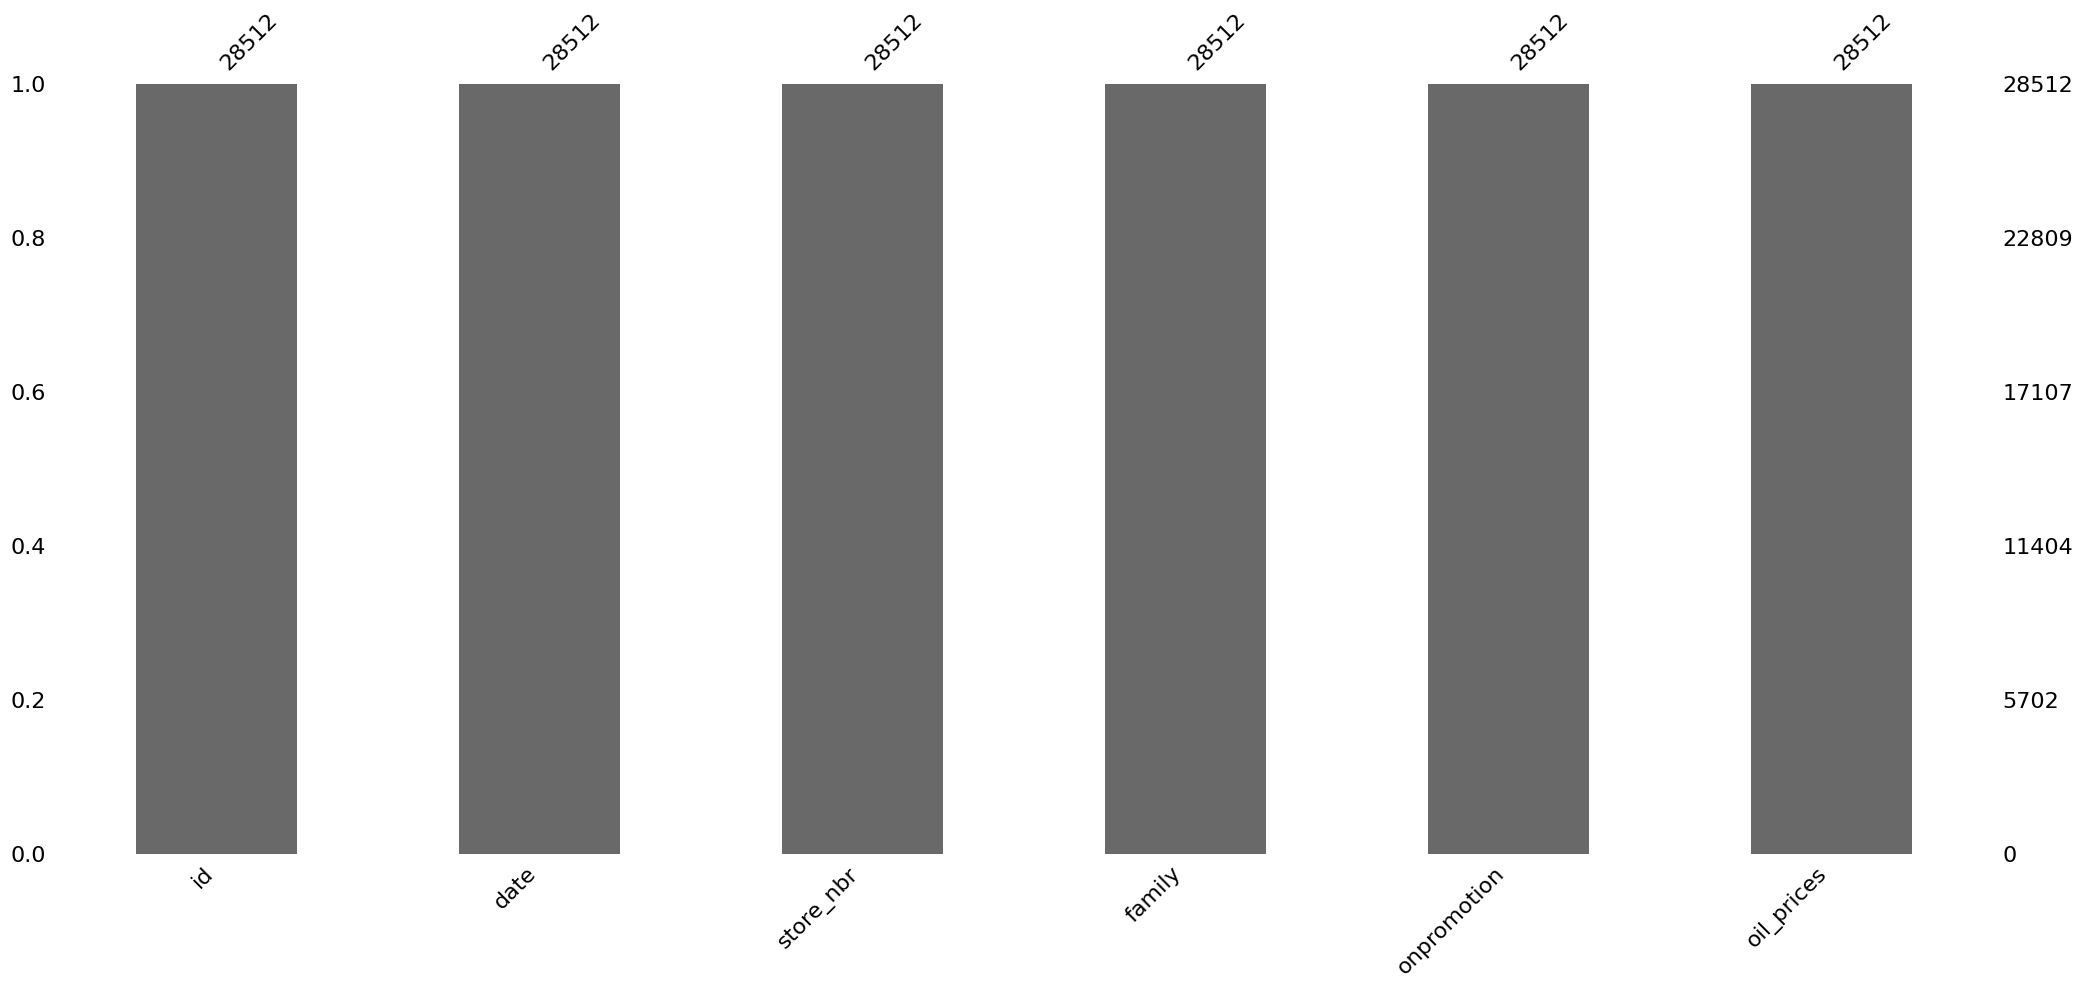

In [30]:
msno.bar(merged_test)

In [31]:
# check for null values of the oil_train dataset

oil_train.isnull().sum()

date           0
oil_prices    43
dtype: int64

In [32]:
# Interpolate missing values using linear interpolation
# interpolation method used to capture local trends because there were few missing values within a relatively stable trend

oil_train_interpolated = oil_train.interpolate(method='linear')

In [33]:
# check missing values

oil_train_interpolated.isnull().sum()

date          0
oil_prices    1
dtype: int64

In [34]:
# back fill missing data at the beginning of dataset 
# check if missing data is filled

oil_train_interpolated['oil_prices'].fillna(method='bfill', inplace=True)
oil_train_interpolated.isnull().sum()

date          0
oil_prices    0
dtype: int64

In [35]:
# merge train and oil_train_interpolated datasets
# print merged dataset to see if successfull

merged_train = pd.merge(oil_train_interpolated, train, on='date', how='right')
print(merged_train.head())

        date  oil_prices  id  store_nbr      family  sales  onpromotion
0 2013-01-01   93.139999   0          1  AUTOMOTIVE    0.0            0
1 2013-01-01   93.139999   1          1   BABY CARE    0.0            0
2 2013-01-01   93.139999   2          1      BEAUTY    0.0            0
3 2013-01-01   93.139999   3          1   BEVERAGES    0.0            0
4 2013-01-01   93.139999   4          1       BOOKS    0.0            0


In [36]:
merged_train.shape

(3000888, 7)

In [37]:
# check for missing values in merged dataset

merged_train.isnull().sum()

date                0
oil_prices     857142
id                  0
store_nbr           0
family              0
sales               0
onpromotion         0
dtype: int64

<Axes: >

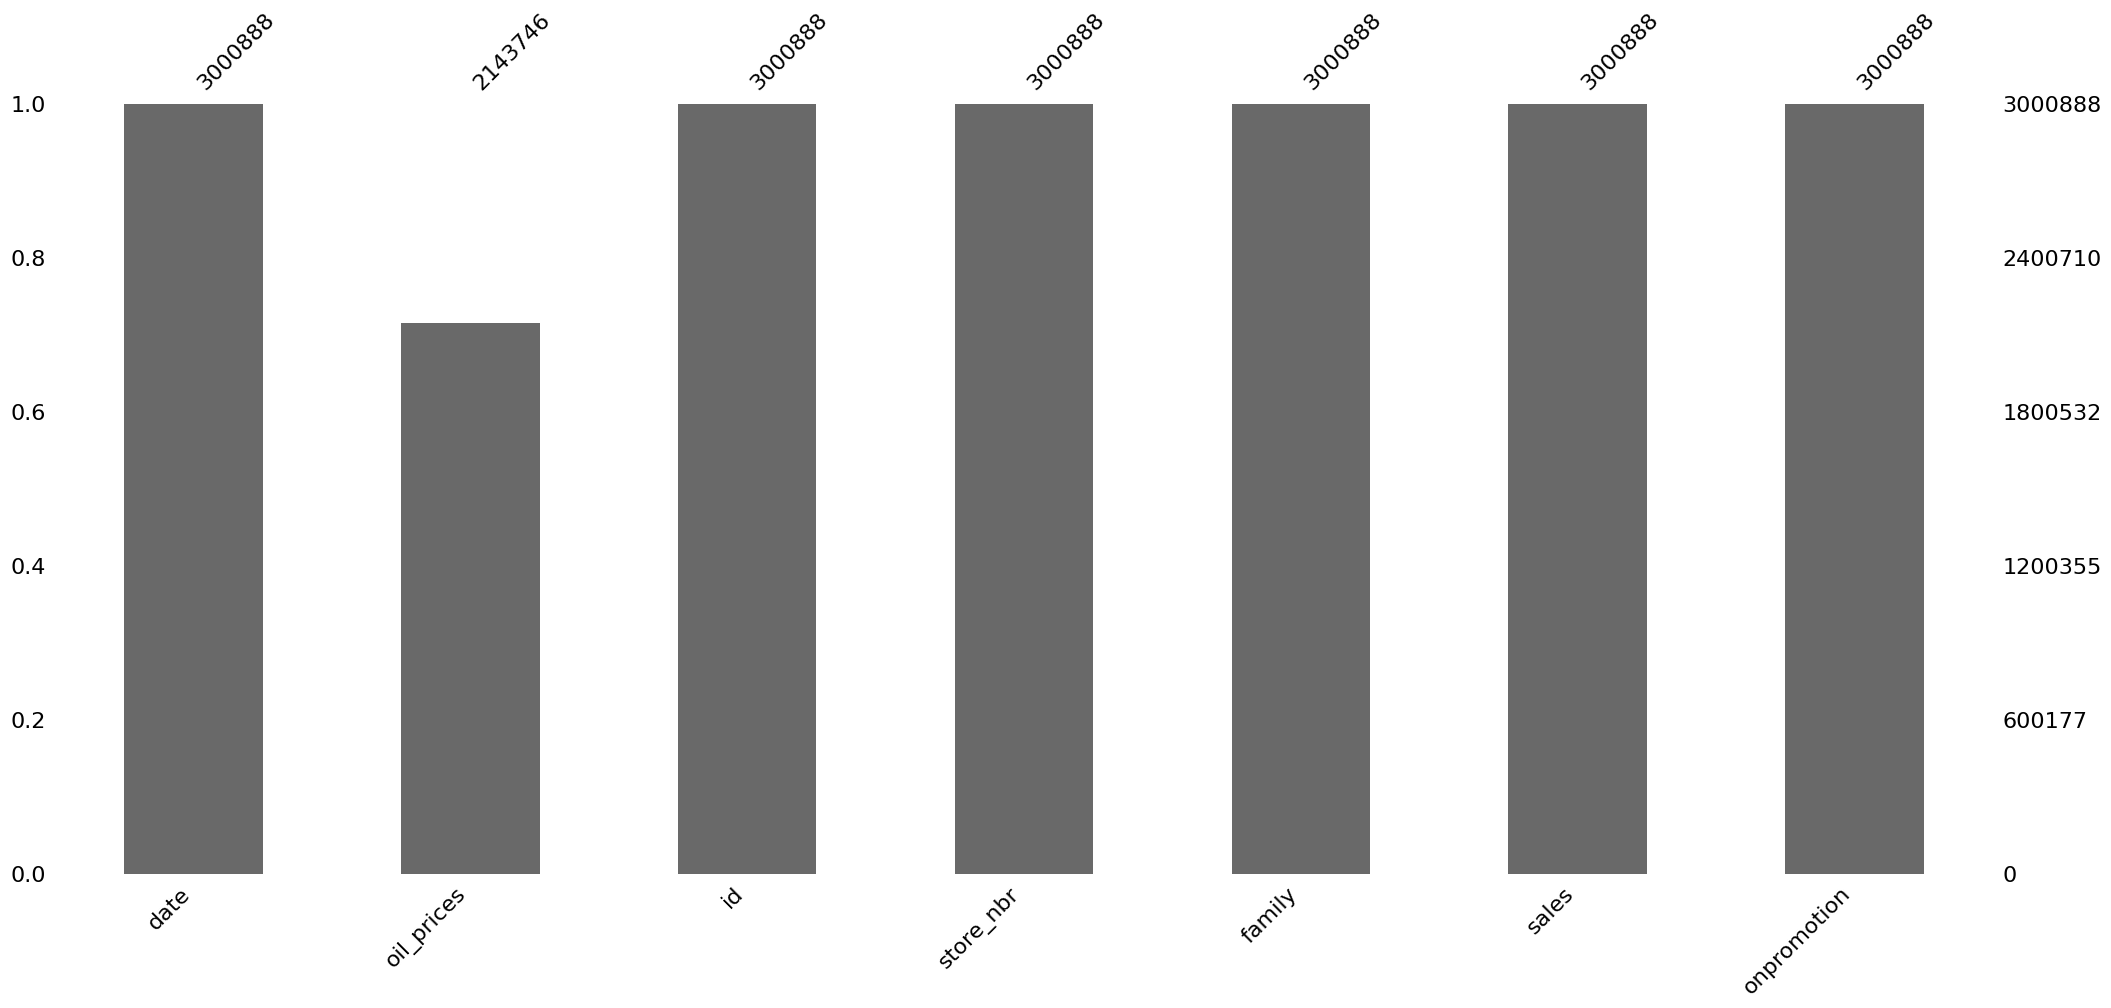

In [38]:
msno.bar(merged_train)

In [39]:
# calculate the percentage of missing data against the total values
# we observe a 28.5% missing data in oil_prices column

mis_train_value_percent = 100*merged_train.isnull().sum()/len(merged_train)
print(mis_train_value_percent)

date            0.000000
oil_prices     28.562945
id              0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
dtype: float64


<Axes: >

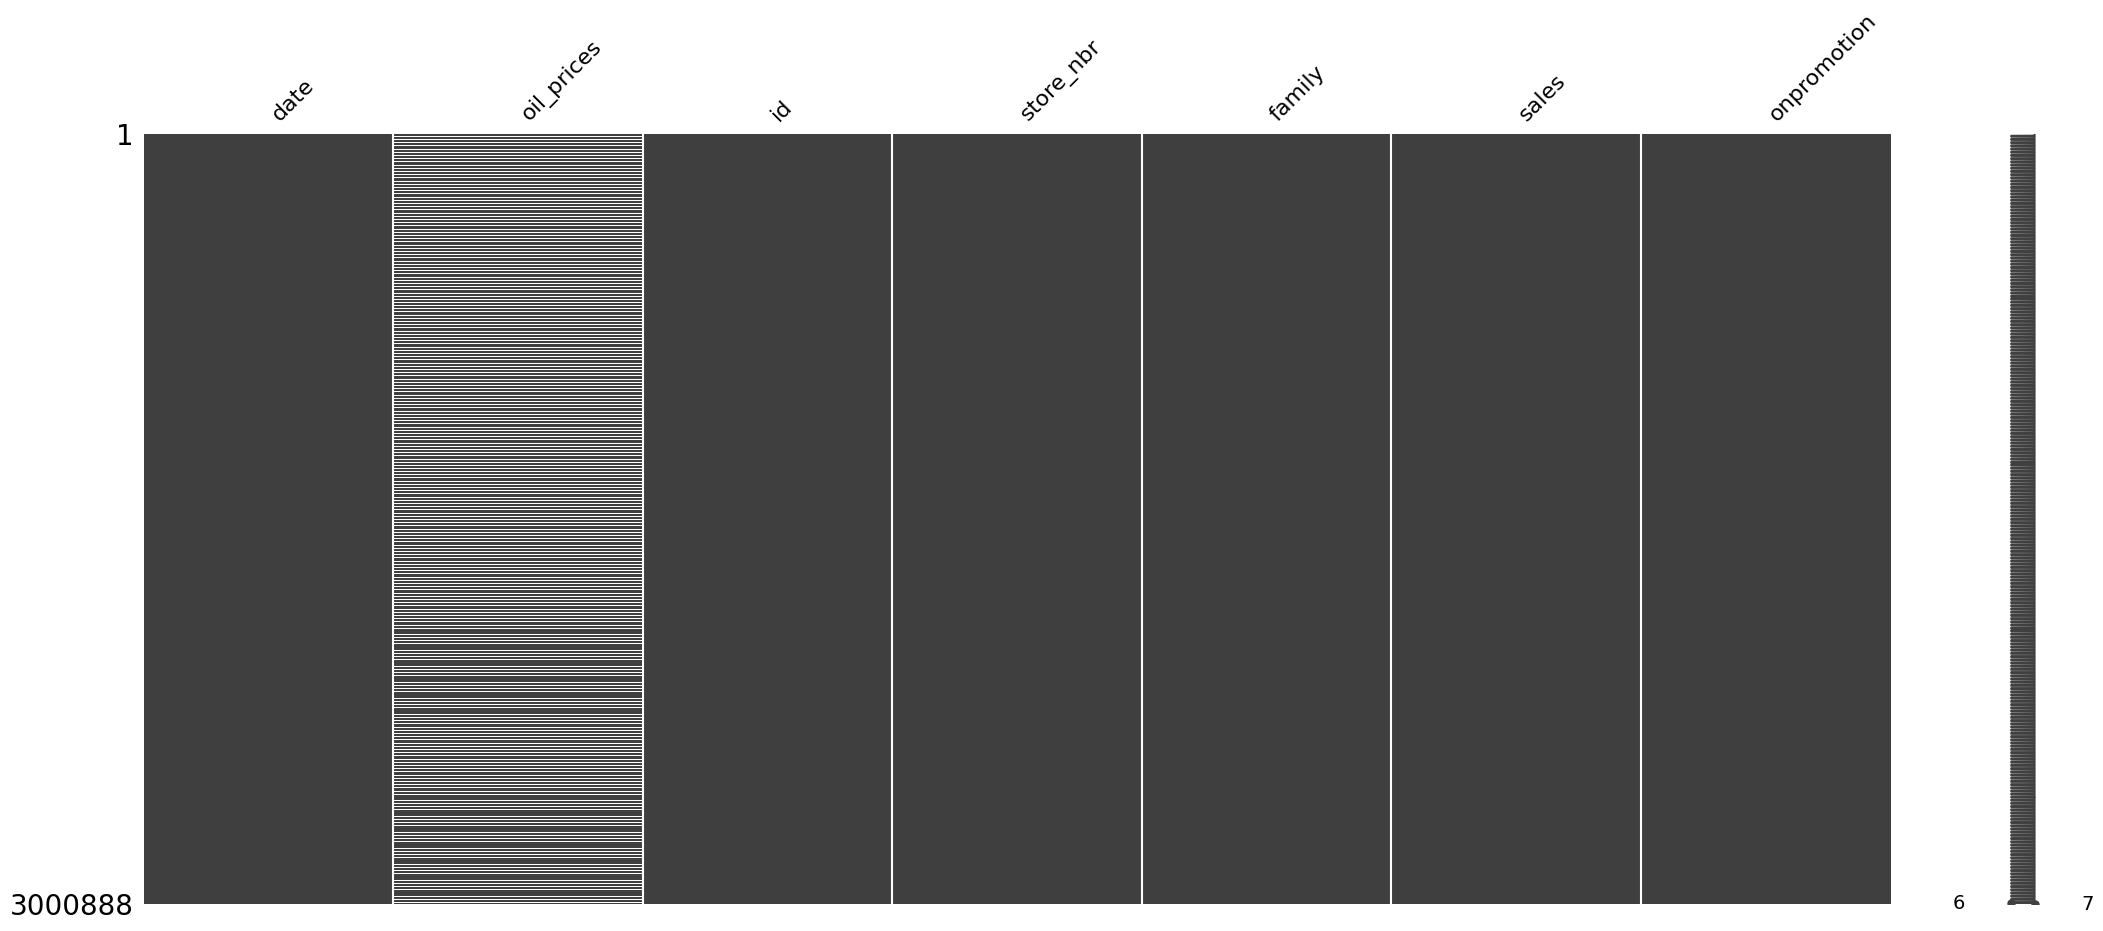

In [40]:
# plot a matrix visualization of missing values in merged train
# check how the missing date is distributed through our merged data
# missing data in the oil_prices columns shows a missing at random

msno.matrix(merged_train)

In [41]:
merged_train.shape

(3000888, 7)

In [42]:
#look at missing rows in merged_train

merged_train.query('oil_prices != oil_prices')

,date,oil_prices,id,store_nbr,family,sales,onpromotion
7128,2013-01-05,NaN,7128,1,AUTOMOTIVE,5.000,0
7129,2013-01-05,NaN,7129,1,BABY CARE,0.000,0
7130,2013-01-05,NaN,7130,1,BEAUTY,3.000,0
7131,2013-01-05,NaN,7131,1,BEVERAGES,1160.000,0
7132,2013-01-05,NaN,7132,1,BOOKS,0.000,0
...,...,...,...,...,...,...,...
2997319,2017-08-13,NaN,2997319,9,POULTRY,412.458,0
2997320,2017-08-13,NaN,2997320,9,PREPARED FOODS,105.169,1
2997321,2017-08-13,NaN,2997321,9,PRODUCE,1693.607,7
2997322,2017-08-13,NaN,2997322,9,SCHOOL AND OFFICE SUPPLIES,200.000,8


In [43]:
# check the shape of merged_train

merged_train.shape

(3000888, 7)

In [44]:
# forward fill missing 'oil_prices' 

forward_filled_merge_train = merged_train['oil_prices'].fillna(method='ffill', inplace=True)
print(forward_filled_merge_train)

None


In [45]:
merged_train.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [46]:
merged_train.head()

,date,oil_prices,id,store_nbr,family,sales,onpromotion
0,2013-01-01,93.139999,0,1,AUTOMOTIVE,0.0,0
1,2013-01-01,93.139999,1,1,BABY CARE,0.0,0
2,2013-01-01,93.139999,2,1,BEAUTY,0.0,0
3,2013-01-01,93.139999,3,1,BEVERAGES,0.0,0
4,2013-01-01,93.139999,4,1,BOOKS,0.0,0


In [47]:
merged_test['store_nbr'].nunique()

54

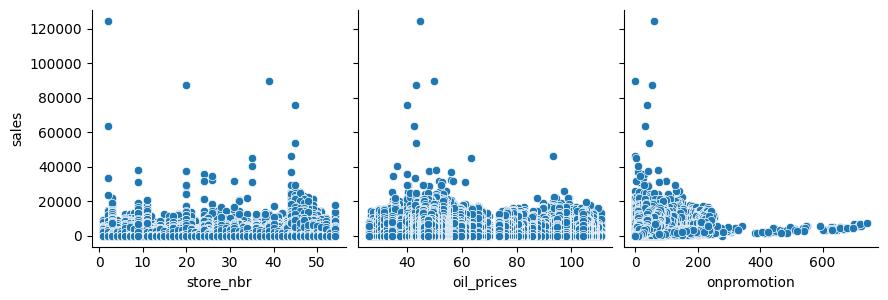

In [48]:
# Pair plot between store_nbr, oil prices, and onpromotion

sns.pairplot(merged_train,x_vars=['store_nbr','oil_prices','onpromotion'],y_vars=['sales'],height=3,aspect=1)
plt.show()

In [49]:
merged_train['family'].nunique()

33

<Axes: xlabel='date', ylabel='sales'>

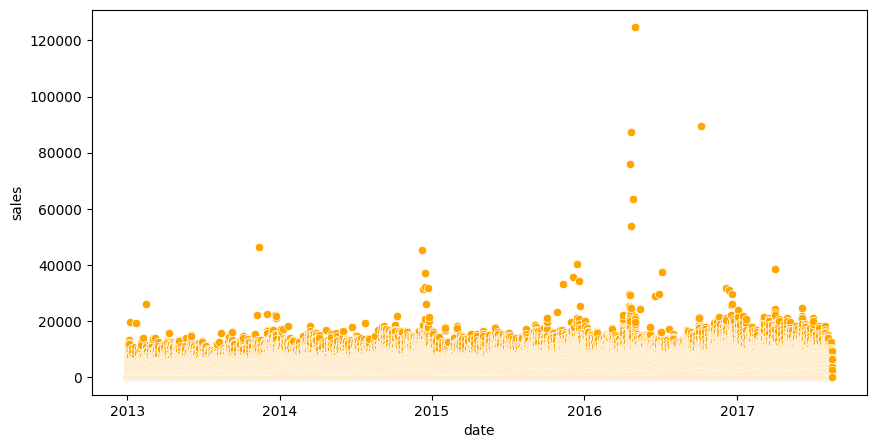

In [50]:
a=merged_train['date']
b=merged_train['sales']
plt.figure(figsize=(10,5))
sns.scatterplot(x=a,y=b,color='orange')

<Axes: xlabel='oil_prices', ylabel='sales'>

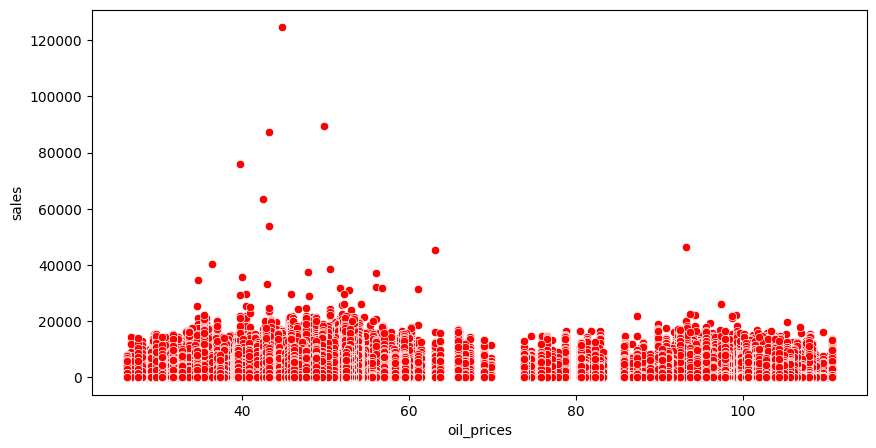

In [51]:
a=merged_train['oil_prices']
b=merged_train['sales']
plt.figure(figsize=(10,5))
sns.scatterplot(x=a,y=b,color='red')

In [52]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 160.3+ MB


In [53]:
# join merge_train and holidays on 'date'

merged_train_holidays = pd.merge(merged_train, holidays_eve, on='date', how='left')
merged_train_holidays.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
 7   type         object        
 8   locale       object        
 9   locale_name  object        
 10  description  object        
 11  transferred  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 279.6+ MB


In [54]:
merged_train_holidays.isnull().sum()

date                 0
oil_prices           0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
type           2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

<Axes: >

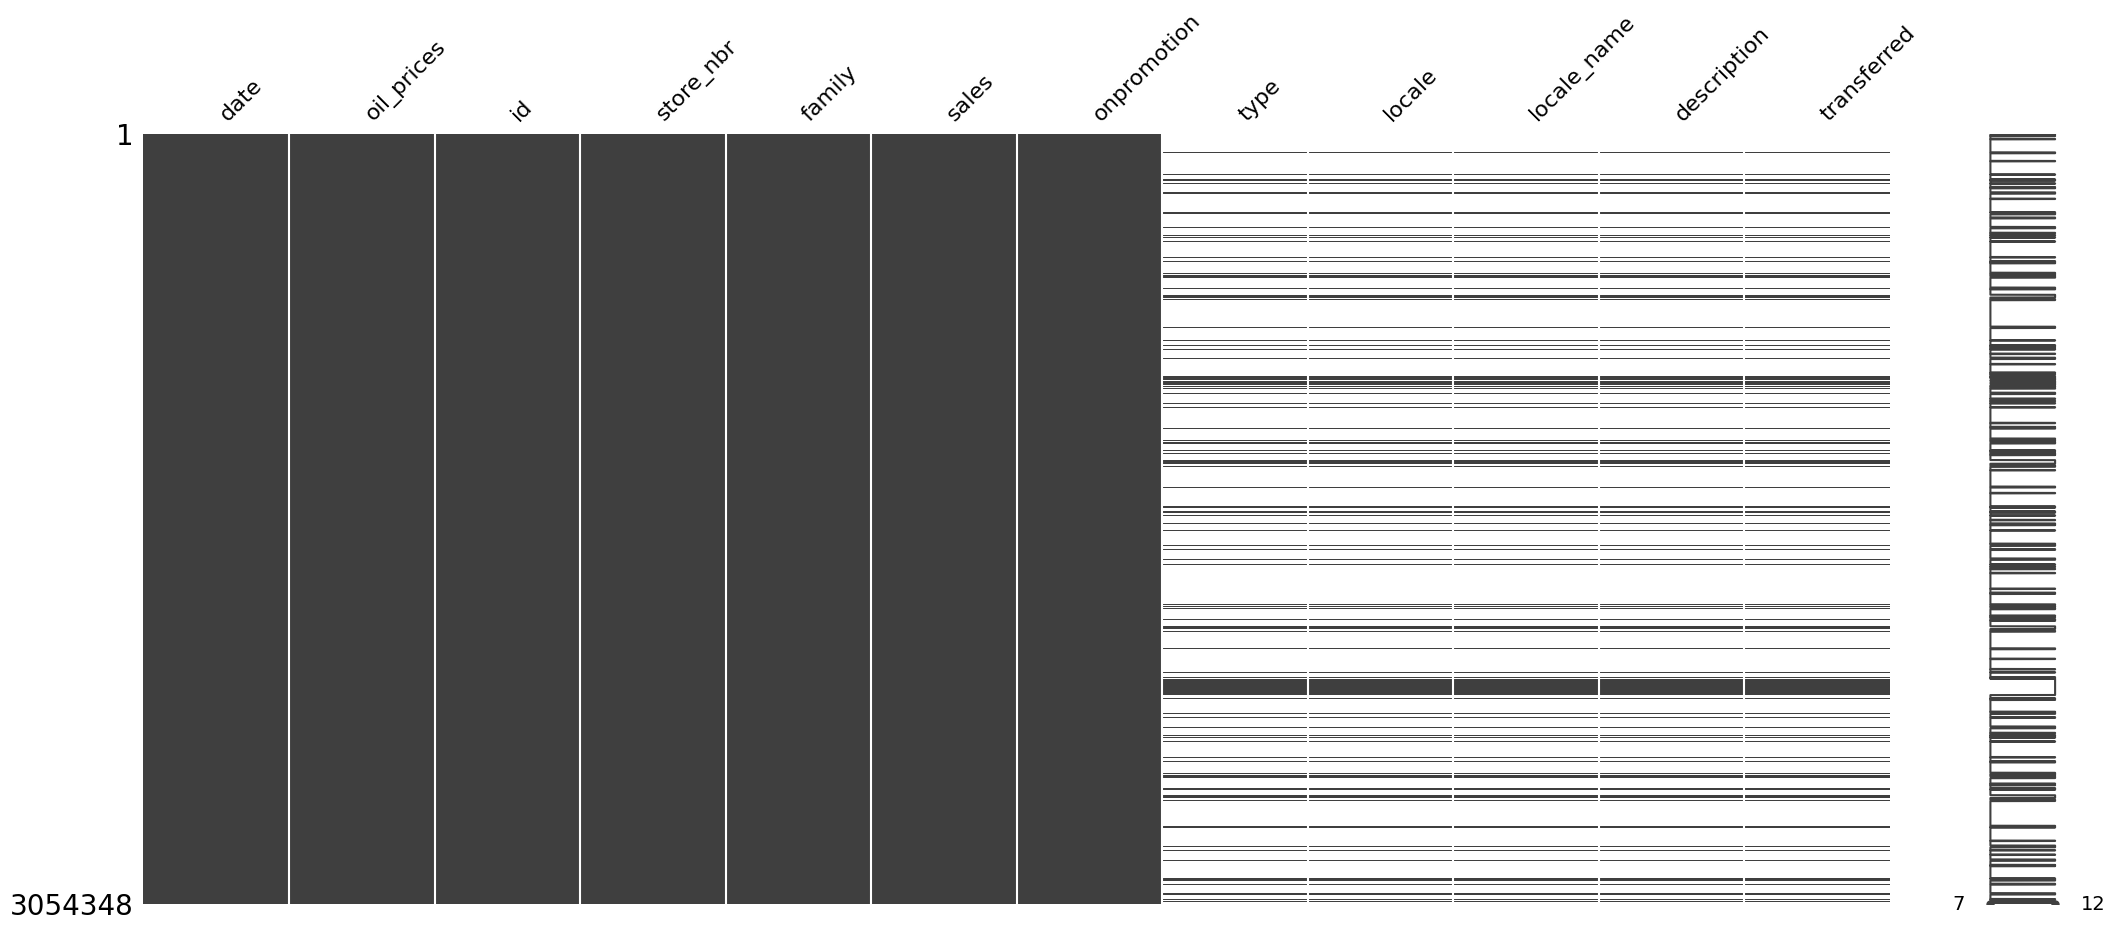

In [55]:
# plot a matrix visualization of missing values in merged_train_holidays
# check how the missing date is distributed through our merged data

msno.matrix(merged_train_holidays)

In [56]:
columns_to_drop = ['locale', 'locale_name', 'description']
merged_train_holidays = merged_train_holidays.drop(columns=columns_to_drop)
merged_train_holidays.isnull().sum()

date                 0
oil_prices           0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
type           2551824
transferred    2551824
dtype: int64

In [57]:
# Define the unique values to be renamed to 'not holiday'
values_to_rename = ['Transfer', 'Additional', 'Bridge', 'Work Day','Event']

# Rename the specified unique values to 'not holiday'
#merged_train_holidays['Holiday'].replace(values_to_rename, 'not holiday', inplace=True)
merged_train_holidays['type'].replace(values_to_rename, 'not holiday', inplace=True)

# Fill missing values with 'not holiday'
merged_train_holidays['type'].fillna('not holiday', inplace=True)

merged_train_holidays.isnull().sum()

date                 0
oil_prices           0
id                   0
store_nbr            0
family               0
sales                0
onpromotion          0
type                 0
transferred    2551824
dtype: int64

In [58]:
# fill missing values in 'transferred' with False
# Fill missing values with False

merged_train_holidays = merged_train_holidays.fillna(False)
merged_train_holidays.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
type           0
transferred    0
dtype: int64

In [59]:
merged_train_holidays.shape

(3054348, 9)

In [60]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [61]:
# join merge_train_holidays and stores on 'store_nbr'

merged_train_holidays_stores = pd.merge(merged_train_holidays, stores, on='store_nbr', how='left')
merged_train_holidays_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   oil_prices   float64       
 2   id           int64         
 3   store_nbr    int64         
 4   family       object        
 5   sales        float64       
 6   onpromotion  int64         
 7   type_x       object        
 8   transferred  bool          
 9   city         object        
 10  state        object        
 11  type_y       object        
 12  cluster      int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 282.5+ MB


In [62]:
merged_train_holidays_stores.isnull().sum()

date           0
oil_prices     0
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
type_x         0
transferred    0
city           0
state          0
type_y         0
cluster        0
dtype: int64

In [63]:
merged_test.shape

(28512, 6)

In [64]:
# join merge_test and holidays on 'date'

merged_test_holidays = pd.merge(merged_test, holidays_eve, on='date', how='left')
merged_test_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   oil_prices   28512 non-null  float64       
 6   type         1782 non-null   object        
 7   locale       1782 non-null   object        
 8   locale_name  1782 non-null   object        
 9   description  1782 non-null   object        
 10  transferred  1782 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 2.4+ MB


In [65]:
merged_test_holidays.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
oil_prices         0
type           26730
locale         26730
locale_name    26730
description    26730
transferred    26730
dtype: int64

<Axes: >

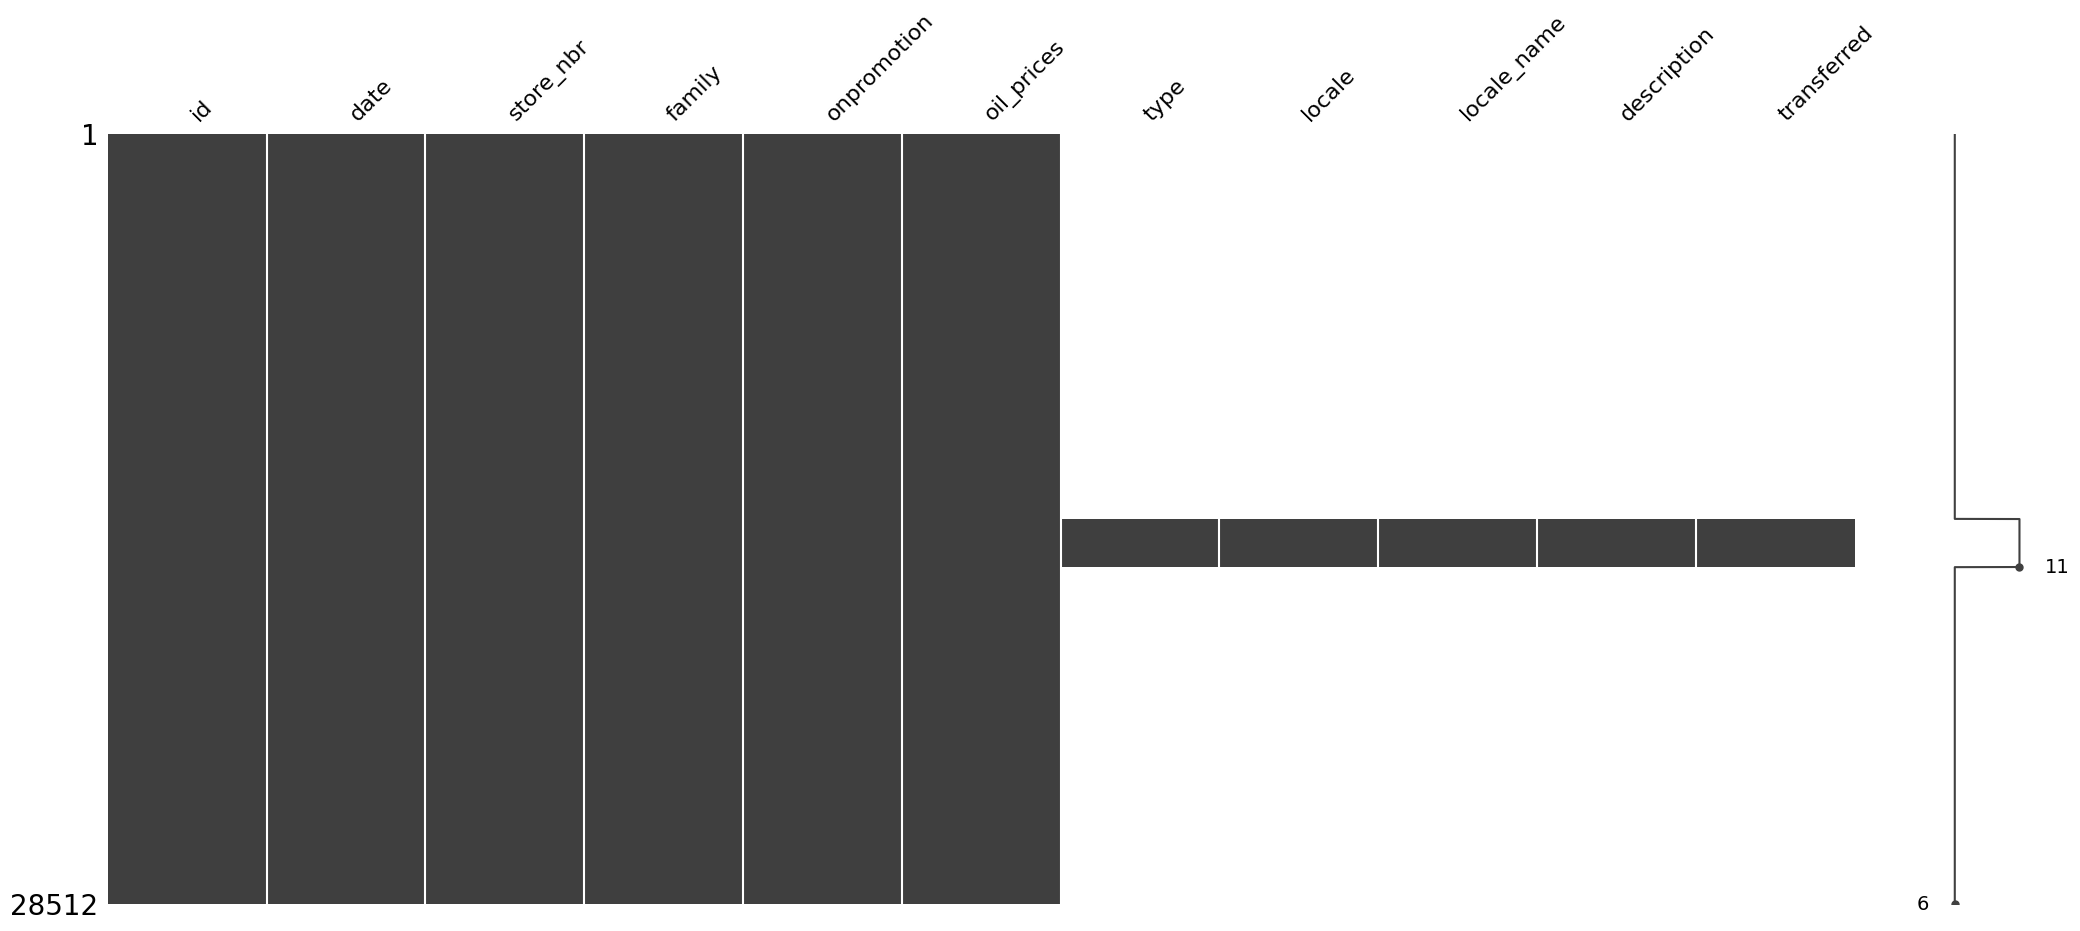

In [66]:
# plot a matrix visualization of missing values in merged_test_holidays
# check how the missing date is distributed through our merged data

msno.matrix(merged_test_holidays)

In [67]:
test_columns_to_drop = ['locale', 'locale_name', 'description']
merged_test_holidays = merged_test_holidays.drop(columns=test_columns_to_drop)
merged_test_holidays.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
oil_prices         0
type           26730
transferred    26730
dtype: int64

In [68]:
# Define the unique values to be renamed to 'not holiday'
values_to_rename = ['Transfer', 'Additional', 'Bridge', 'Work Day','Event']

# Rename the specified unique values to 'not holiday'
#merged_test_holidays['Holiday'].replace(values_to_rename, 'not holiday', inplace=True)
merged_test_holidays['type'].replace(values_to_rename, 'not holiday', inplace=True)

# Fill missing values with 'not holiday'
merged_test_holidays['type'].fillna('not holiday', inplace=True)

merged_test_holidays.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
oil_prices         0
type               0
transferred    26730
dtype: int64

In [69]:
# fill missing values in 'transferred' with False
# Fill missing values with False

merged_test_holidays = merged_test_holidays.fillna(False)
merged_test_holidays.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
type           0
transferred    0
dtype: int64

In [70]:
merged_test_holidays.shape

(28512, 8)

In [71]:
# join merge_test_holidays and stores on 'store_nbr'

merged_test_holidays_stores = pd.merge(merged_test_holidays, stores, on='store_nbr', how='left')
merged_test_holidays_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   oil_prices   28512 non-null  float64       
 6   type_x       28512 non-null  object        
 7   transferred  28512 non-null  bool          
 8   city         28512 non-null  object        
 9   state        28512 non-null  object        
 10  type_y       28512 non-null  object        
 11  cluster      28512 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.4+ MB


In [72]:
merged_test_holidays_stores.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
oil_prices     0
type_x         0
transferred    0
city           0
state          0
type_y         0
cluster        0
dtype: int64

In [73]:
# check for duplicates in merged_train_holidays_stores and merged_test_holidays_stores

# Check for duplicates in all columns
train_duplicates = merged_train_holidays_stores[merged_train_holidays_stores.duplicated(keep=False)]

if train_duplicates.empty:
    print("No duplicates found in any column.")
else:
    print("Duplicates found in the following rows:")
    print(train_duplicates)

Duplicates found in the following rows:
              date  oil_prices       id  store_nbr  \
313632  2013-06-25   95.250000   311850          1   
313633  2013-06-25   95.250000   311850          1   
313634  2013-06-25   95.250000   311850          1   
313635  2013-06-25   95.250000   311851          1   
313636  2013-06-25   95.250000   311851          1   
...            ...         ...      ...        ...   
2977717 2017-07-03   45.716667  2924259          9   
2977718 2017-07-03   45.716667  2924260          9   
2977719 2017-07-03   45.716667  2924260          9   
2977720 2017-07-03   45.716667  2924261          9   
2977721 2017-07-03   45.716667  2924261          9   

                             family     sales  onpromotion   type_x  \
313632                   AUTOMOTIVE     2.000            0  Holiday   
313633                   AUTOMOTIVE     2.000            0  Holiday   
313634                   AUTOMOTIVE     2.000            0  Holiday   
313635                    B

In [74]:
print(train_duplicates.shape)
print(merged_train_holidays_stores.shape)

(62370, 13)
(3054348, 13)


In [75]:
# Remove rows with all duplicates
clean_train = merged_train_holidays_stores[~merged_train_holidays_stores.duplicated(keep=False)]
clean_train.shape

(2991978, 13)

In [76]:
# Check for duplicates in all columns
test_duplicates = merged_test_holidays_stores[merged_test_holidays_stores.duplicated(keep=False)]

if test_duplicates.empty:
    print("No duplicates found in any column.")
else:
    print("Duplicates found in the following rows:")
    print(test_duplicates)

No duplicates found in any column.


In [77]:
#display random sample of 10 rows

clean_train.sample(10, random_state = 0)

,date,oil_prices,id,store_nbr,family,sales,onpromotion,type_x,transferred,city,state,type_y,cluster
378701,2013-07-28,104.760002,371573,34,PET SUPPLIES,0.000,0,not holiday,False,Guayaquil,Guayas,B,6
2238327,2016-05-24,48.040001,2202687,13,BEVERAGES,1266.000,14,Holiday,True,Latacunga,Cotopaxi,C,15
336858,2013-07-05,103.089996,329730,10,PLAYERS AND ELECTRONICS,0.000,0,not holiday,False,Quito,Pichincha,C,15
2092286,2016-03-08,36.669998,2065556,15,LAWN AND GARDEN,0.000,0,not holiday,False,Ibarra,Imbabura,C,15
1731612,2015-08-18,42.580002,1706664,45,BEVERAGES,6073.000,7,not holiday,False,Quito,Pichincha,A,11
2023277,2016-01-29,33.660000,1996547,29,HARDWARE,1.000,0,not holiday,False,Guayaquil,Guayas,E,10
46981,2013-01-27,95.150002,46981,27,"LIQUOR,WINE,BEER",0.000,0,not holiday,False,Daule,Guayas,D,1
1685366,2015-07-23,48.110001,1660418,47,MAGAZINES,0.000,0,Holiday,False,Quito,Pichincha,A,14
1486204,2015-04-06,52.080002,1466602,1,HOME AND KITCHEN II,3.000,0,not holiday,False,Quito,Pichincha,D,13
1050269,2014-08-05,97.339996,1034231,28,FROZEN FOODS,47.202,0,Holiday,False,Guayaquil,Guayas,E,10


In [78]:
#display random sample of 10 rows

merged_test_holidays_stores.sample(10, random_state = 0)

,id,date,store_nbr,family,onpromotion,oil_prices,type_x,transferred,city,state,type_y,cluster
12290,3013178,2017-08-22,53,HARDWARE,0,47.650002,not holiday,False,Manta,Manabi,D,13
4348,3005236,2017-08-18,30,PERSONAL CARE,7,48.590000,not holiday,False,Guayaquil,Guayas,C,3
6617,3007505,2017-08-19,44,HOME APPLIANCES,0,48.590000,not holiday,False,Quito,Pichincha,A,5
13693,3014581,2017-08-23,42,SCHOOL AND OFFICE SUPPLIES,0,48.450001,not holiday,False,Cuenca,Azuay,D,2
3008,3003896,2017-08-17,43,BREAD/BAKERY,8,47.070000,not holiday,False,Esmeraldas,Esmeraldas,E,10
12793,3013681,2017-08-23,18,"LIQUOR,WINE,BEER",3,48.450001,not holiday,False,Quito,Pichincha,B,16
5078,3005966,2017-08-18,50,PREPARED FOODS,0,48.590000,not holiday,False,Ambato,Tungurahua,A,14
8487,3009375,2017-08-20,47,CELEBRATION,0,48.590000,not holiday,False,Quito,Pichincha,A,14
24504,3025392,2017-08-29,46,HOME CARE,5,46.459999,not holiday,False,Quito,Pichincha,A,14
8184,3009072,2017-08-20,39,AUTOMOTIVE,0,48.590000,not holiday,False,Cuenca,Azuay,B,6


In [79]:
clean_test = merged_test_holidays_stores
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   oil_prices   28512 non-null  float64       
 6   type_x       28512 non-null  object        
 7   transferred  28512 non-null  bool          
 8   city         28512 non-null  object        
 9   state        28512 non-null  object        
 10  type_y       28512 non-null  object        
 11  cluster      28512 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.4+ MB


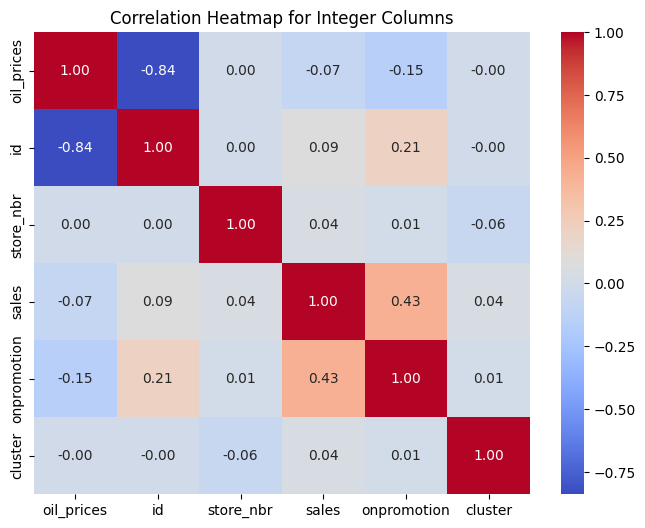

In [80]:
# create a correlation matrix to see which variables are highly correlated
# In general, we want to include variables with high correlation because they are the ones with higher predictive power
# Also gives us an idea on which variables to leave out because they don't affect 'sales' much


# Filter and select only integer columns
integer_columns = clean_train.select_dtypes(include=['int', 'int64', 'int32','float64'])

# Calculate the correlation matrix for the selected integer columns
correlation_matrix = integer_columns.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Correlation Heatmap for Integer Columns')
plt.show()

## Hypothesis testing

* Null Hypothesis: Promotions have no significant effect on product sales.
* Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional 

In [81]:
# Perform ANOVA
model = ols('sales ~ onpromotion', data=clean_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if any(anova_table['PR(>F)'] < alpha):
    print('At least one promotion has a significant effect on sales.')
else:
    print('None of the promotions have a significant effect on sales.')

# Print the ANOVA table
print(anova_table)

At least one promotion has a significant effect on sales.
                   sum_sq         df              F  PR(>F)
onpromotion  6.675404e+11        1.0  669344.100728     0.0
Residual     2.983914e+12  2991976.0            NaN     NaN


### Conclusion on hypothesis test
* We reject the null hypothesis and conclude that promotions has significant effect on sales

## Test for Stationarity

* Null hypothesis : Series is stationary
* Alternate Hypothesis: Series is not stationary

<Axes: >

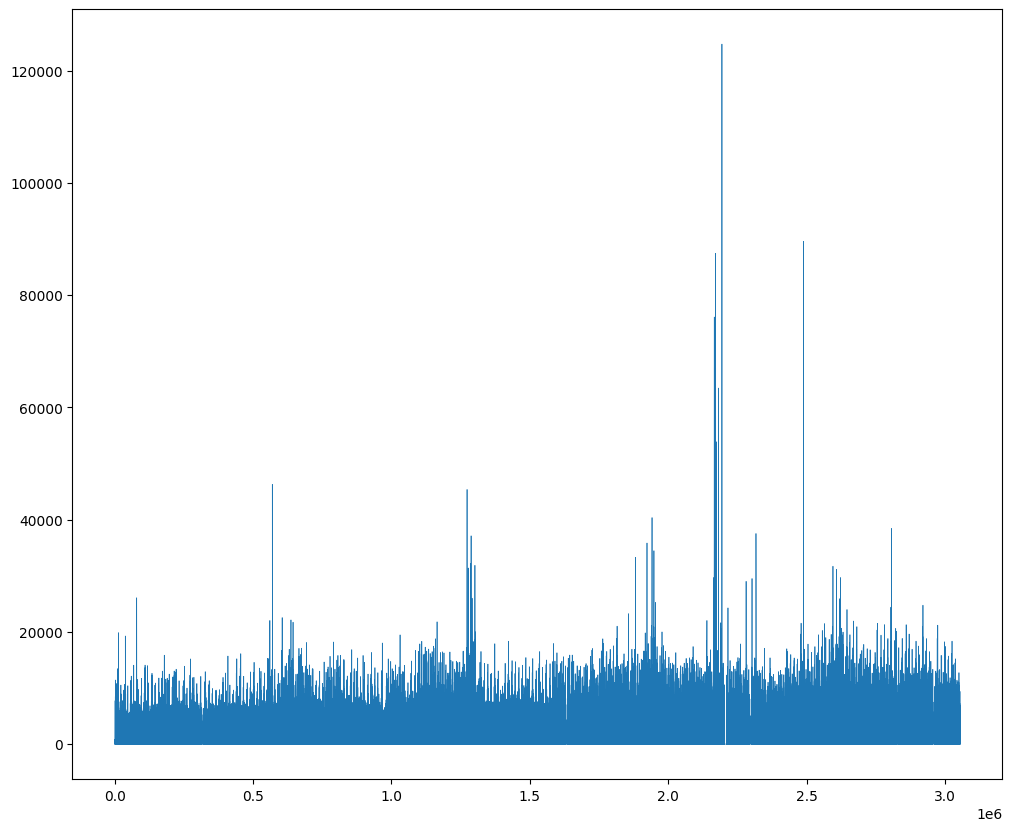

In [82]:
# Visualize data to see pattens of trends and seasonality

plt.figure(figsize=(12,10))
clean_train['sales'].plot(linewidth=0.5)

In [83]:
# set date as indext

clean_train=clean_train.set_index('date')
clean_test=clean_test.set_index('date')


In [84]:
# drop id column for both train and test

clean_train = clean_train.drop(columns='id')
clean_test = clean_test.drop(columns='id')

In [85]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991978 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   oil_prices   float64
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   type_x       object 
 6   transferred  bool   
 7   city         object 
 8   state        object 
 9   type_y       object 
 10  cluster      int64  
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 254.0+ MB


In [86]:
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   store_nbr    28512 non-null  int64  
 1   family       28512 non-null  object 
 2   onpromotion  28512 non-null  int64  
 3   oil_prices   28512 non-null  float64
 4   type_x       28512 non-null  object 
 5   transferred  28512 non-null  bool   
 6   city         28512 non-null  object 
 7   state        28512 non-null  object 
 8   type_y       28512 non-null  object 
 9   cluster      28512 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 2.2+ MB


In [87]:
# Create a date range covering the entire period of interest
start_date = clean_train.index.min()
end_date = clean_train.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Find missing dates in the index
missing_dates = date_range[~date_range.isin(clean_train.index)]

# Display the missing dates
print(missing_dates)


DatetimeIndex(['2013-06-25', '2013-07-03', '2013-12-25', '2014-07-03',
               '2014-12-25', '2014-12-26', '2015-06-25', '2015-07-03',
               '2015-12-25', '2016-05-07', '2016-05-08', '2016-06-25',
               '2016-07-03', '2016-07-24', '2016-12-25', '2017-04-14',
               '2017-06-25', '2017-07-03'],
              dtype='datetime64[ns]', freq=None)


In [88]:
missing_dates

DatetimeIndex(['2013-06-25', '2013-07-03', '2013-12-25', '2014-07-03',
               '2014-12-25', '2014-12-26', '2015-06-25', '2015-07-03',
               '2015-12-25', '2016-05-07', '2016-05-08', '2016-06-25',
               '2016-07-03', '2016-07-24', '2016-12-25', '2017-04-14',
               '2017-06-25', '2017-07-03'],
              dtype='datetime64[ns]', freq=None)

In [89]:
# Create a DataFrame with missing dates and NaN values
missing_data = pd.DataFrame(index=missing_dates, columns=clean_train.columns)

# Concatenate the original DataFrame and the missing data DataFrame
clean_train = pd.concat([clean_train, missing_data])

# Sort the DataFrame by the index (date)
clean_train = clean_train.sort_index()

# Display the updated DataFrame
print(clean_train)

            oil_prices store_nbr                      family     sales  \
2013-01-01   93.139999         1                  AUTOMOTIVE     0.000   
2013-01-01   93.139999        42                 CELEBRATION     0.000   
2013-01-01   93.139999        42                BREAD/BAKERY     0.000   
2013-01-01   93.139999        42                       BOOKS     0.000   
2013-01-01   93.139999        42                   BEVERAGES     0.000   
...                ...       ...                         ...       ...   
2017-08-15   47.570000        25                     SEAFOOD     4.000   
2017-08-15   47.570000        25  SCHOOL AND OFFICE SUPPLIES     1.000   
2017-08-15   47.570000        25                     PRODUCE  1269.174   
2017-08-15   47.570000        28                  GROCERY II    21.000   
2017-08-15   47.570000        21              PREPARED FOODS   135.858   

           onpromotion   type_x transferred           city  \
2013-01-01           0  Holiday       False      

In [90]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991996 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   oil_prices   float64
 1   store_nbr    object 
 2   family       object 
 3   sales        float64
 4   onpromotion  object 
 5   type_x       object 
 6   transferred  object 
 7   city         object 
 8   state        object 
 9   type_y       object 
 10  cluster      object 
dtypes: float64(2), object(9)
memory usage: 273.9+ MB


In [91]:
clean_train.loc['2013-06-25']

oil_prices     NaN
store_nbr      NaN
family         NaN
sales          NaN
onpromotion    NaN
type_x         NaN
transferred    NaN
city           NaN
state          NaN
type_y         NaN
cluster        NaN
Name: 2013-06-25 00:00:00, dtype: object

In [92]:
clean_train.isnull().sum()

oil_prices     18
store_nbr      18
family         18
sales          18
onpromotion    18
type_x         18
transferred    18
city           18
state          18
type_y         18
cluster        18
dtype: int64

In [93]:
# List of column data types you want to interpolate
columns_to_interpolate = ['oil_prices', 'sales', 'onpromotion']

# Loop through each column and interpolate missing values
for column in columns_to_interpolate:
    clean_train[column] = clean_train[column].interpolate(method='linear', limit_direction='both')


In [94]:
# List of column names to interpolate using mode
columns_to_fill_with_mode = ['family','type_x','transferred','city','state','type_y','cluster']

# Loop through each column and fill missing values with the mode
for column in columns_to_fill_with_mode:
    mode_value = clean_train[column].mode().iloc[0]  # Get the mode (most frequent value)
    clean_train[column].fillna(mode_value, inplace=True)

In [95]:
clean_train.isnull().sum()

oil_prices      0
store_nbr      18
family          0
sales           0
onpromotion    18
type_x          0
transferred     0
city            0
state           0
type_y          0
cluster         0
dtype: int64

In [96]:
# specify the data columns to include
clean_train_columns=['onpromotion','oil_prices','sales']

# Resample to weekly frequency, aggregating with mean
clean_train_weekly_mean=clean_train[clean_train_columns].resample('W').mean()
clean_train_weekly_mean.head()

,onpromotion,oil_prices,sales
2013-01-06,0.0,93.101668,206.843478
2013-01-13,0.0,93.442856,190.285220
2013-01-20,0.0,94.875714,189.835452
2013-01-27,0.0,95.399999,182.152050
2013-02-03,0.0,97.368572,198.564267


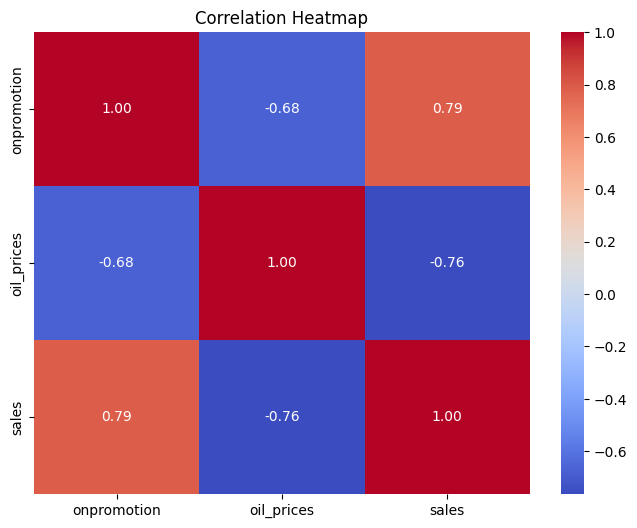

In [97]:
# Calculate the correlation matrix for the aggregated weekly average of oil_prices and sales
correlation_matrix = clean_train_weekly_mean.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Correlation Heatmap')
plt.show()

<Axes: ylabel='sales'>

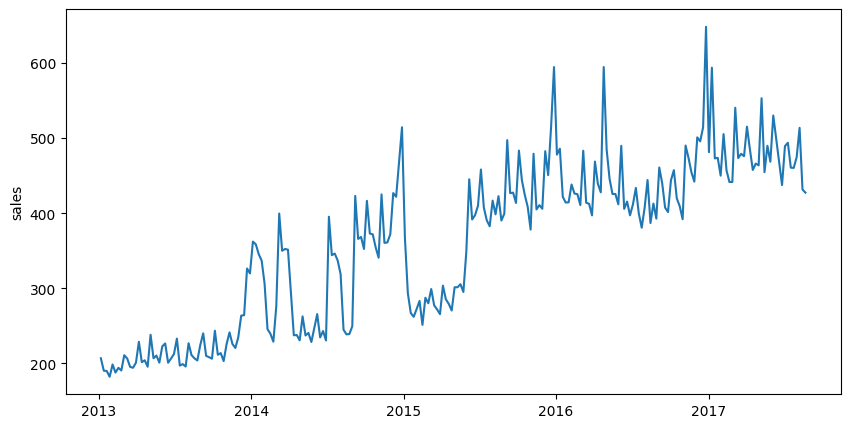

In [98]:
#look at the weekly mean over the period

plt.figure(figsize=(10,5))
sns.lineplot(x=clean_train_weekly_mean.index,y=clean_train_weekly_mean['sales'])

In [99]:
# specify the data columns to include
clean_train_columns=['onpromotion','oil_prices','sales']
# Resample to monthly frequency, aggregating with mean
clean_train_monthly_mean=clean_train[clean_train_columns].resample('M').mean()
clean_train_monthly_mean.head()

,onpromotion,oil_prices,sales
2013-01-31,0.0,94.640000,186.952405
2013-02-28,0.0,95.416785,193.581846
2013-03-31,0.0,93.210322,206.880581
2013-04-30,0.0,91.793000,205.639071
2013-05-31,0.0,94.703281,210.184563


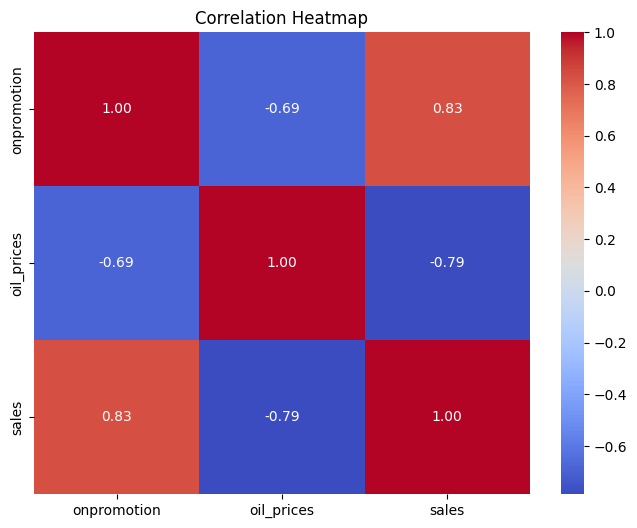

In [100]:
# Calculate the correlation matrix for the aggregated weekly average of oil_prices and sales
correlation_matrix = clean_train_monthly_mean.corr()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title('Correlation Heatmap')
plt.show()

<Axes: ylabel='sales'>

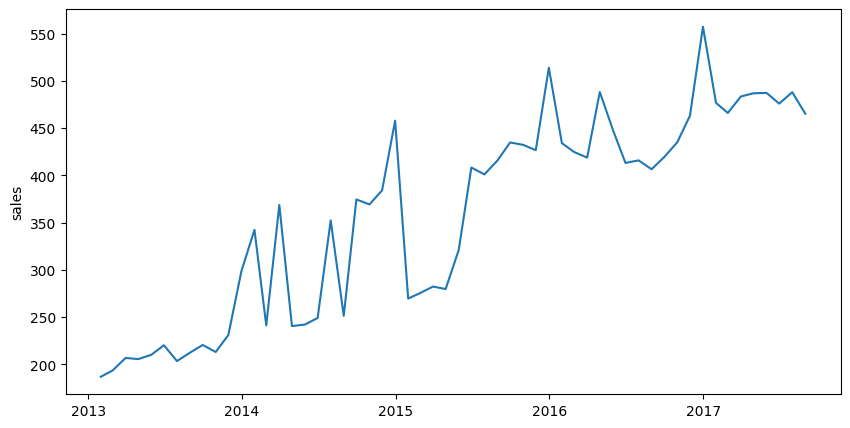

In [101]:
#look at the monthly mean over the period

plt.figure(figsize=(10,5))
sns.lineplot(x=clean_train_monthly_mean.index,y=clean_train_monthly_mean['sales'])

In [102]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991996 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   oil_prices   float64
 1   store_nbr    object 
 2   family       object 
 3   sales        float64
 4   onpromotion  object 
 5   type_x       object 
 6   transferred  bool   
 7   city         object 
 8   state        object 
 9   type_y       object 
 10  cluster      int64  
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 286.2+ MB


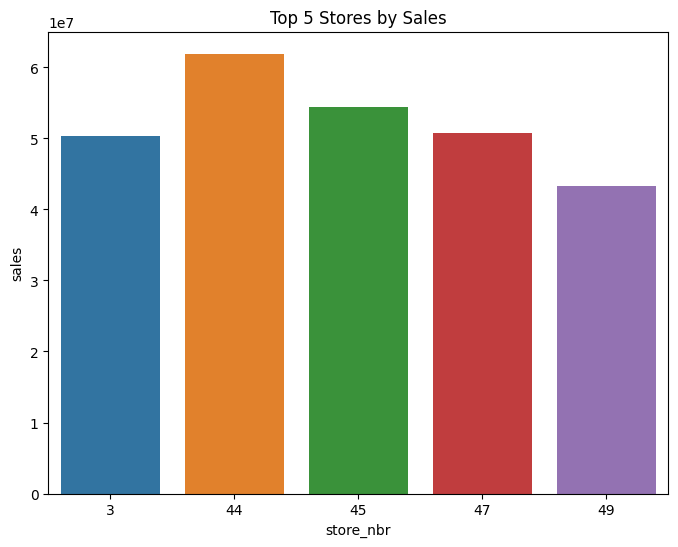

In [103]:
sales_market=clean_train.groupby('store_nbr')['sales'].sum().reset_index()
# Sort the DataFrame by 'sales' in descending order and pick the top 5
top_5_stores = sales_market.sort_values(by='sales', ascending=False).head(5)


plt.figure(figsize=(8,6))
sns.barplot(data=top_5_stores,x='store_nbr',y='sales')
plt.title('Top 5 Stores by Sales')
plt.show()

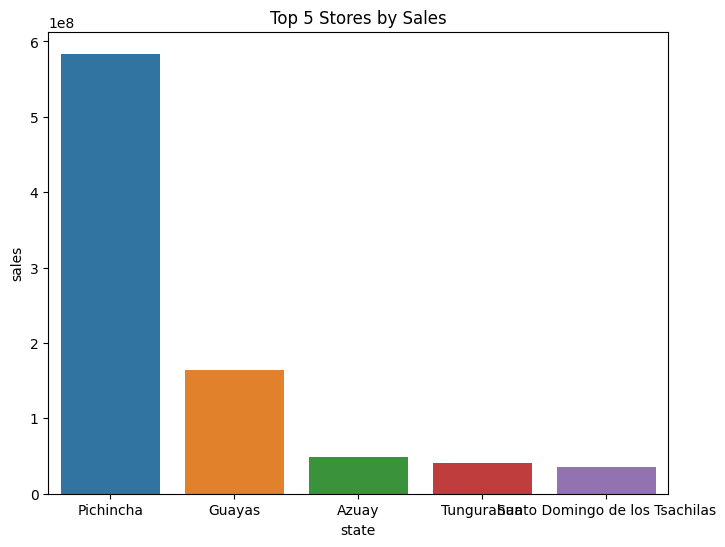

In [104]:
state_sales=clean_train.groupby('state')['sales'].sum().reset_index()
# Sort the DataFrame by 'sales' in descending order and pick the top 5
top_5_stores = state_sales.sort_values(by='sales', ascending=False).head(5)


plt.figure(figsize=(8,6))
sns.barplot(data=top_5_stores,x='state',y='sales')
plt.title('Top 5 Stores by Sales')
plt.show()

<Axes: ylabel='sales'>

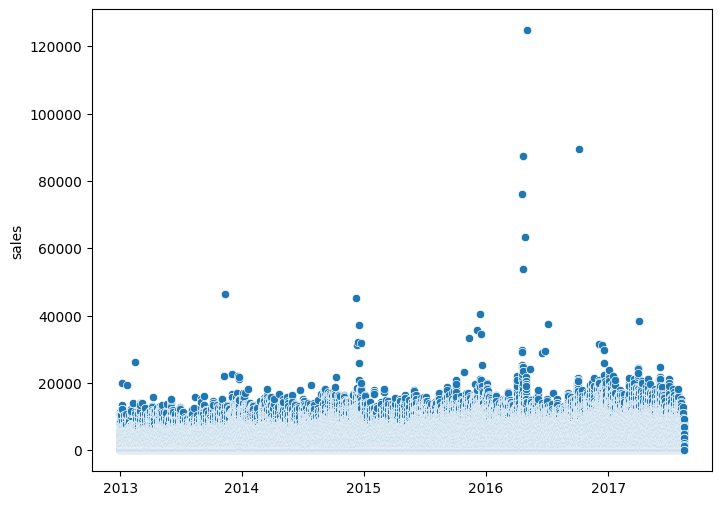

In [105]:
plt.figure(figsize=(8,6))
sns.scatterplot(clean_train['sales'])

<Axes: ylabel='sales'>

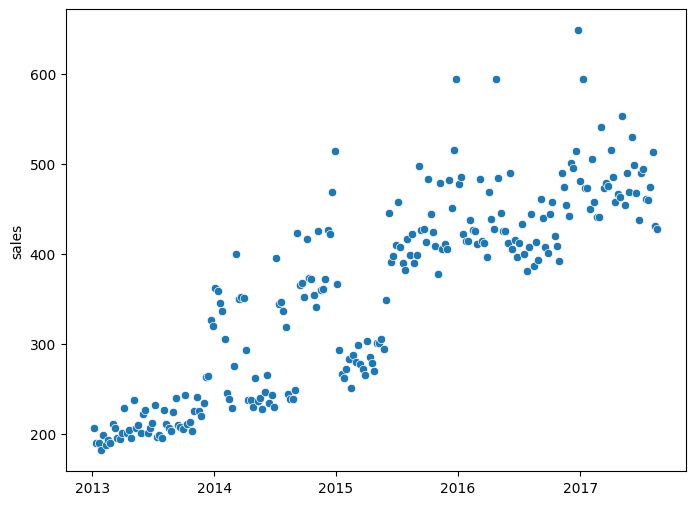

In [106]:
plt.figure(figsize=(8,6))
sns.scatterplot(clean_train_weekly_mean['sales'])

<Axes: ylabel='sales'>

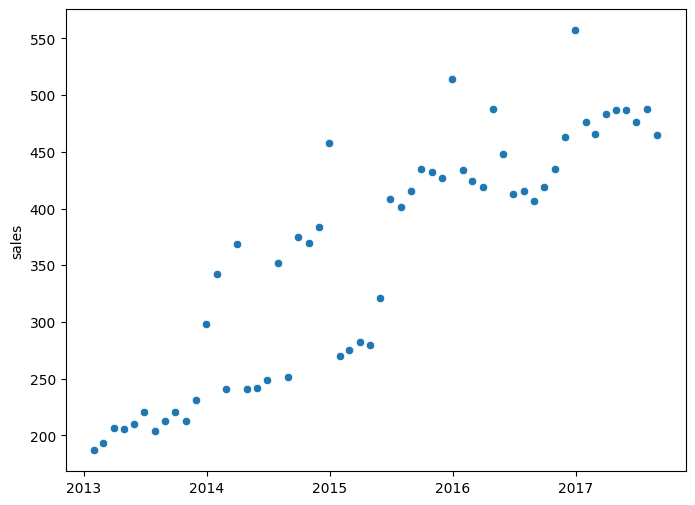

In [107]:
plt.figure(figsize=(8,6))
sns.scatterplot(clean_train_monthly_mean['sales'])

In [108]:
clean_train.head()

,oil_prices,store_nbr,family,sales,onpromotion,type_x,transferred,city,state,type_y,cluster
2013-01-01,93.139999,1,AUTOMOTIVE,0.0,0,Holiday,False,Quito,Pichincha,D,13
2013-01-01,93.139999,42,CELEBRATION,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BREAD/BAKERY,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BOOKS,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BEVERAGES,0.0,0,Holiday,False,Cuenca,Azuay,D,2


In [109]:
clean_train=clean_train.rename(columns={'type_x':'IsHoliday'})
clean_train.head()

,oil_prices,store_nbr,family,sales,onpromotion,IsHoliday,transferred,city,state,type_y,cluster
2013-01-01,93.139999,1,AUTOMOTIVE,0.0,0,Holiday,False,Quito,Pichincha,D,13
2013-01-01,93.139999,42,CELEBRATION,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BREAD/BAKERY,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BOOKS,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BEVERAGES,0.0,0,Holiday,False,Cuenca,Azuay,D,2


In [110]:
clean_train=clean_train.rename(columns={'family':'ProductCategory'})
clean_train=clean_train.rename(columns={'transferred':'Holiday_transferred'})
clean_train=clean_train.rename(columns={'cluster':'store_cluster'})
clean_train.head()

,oil_prices,store_nbr,ProductCategory,sales,onpromotion,IsHoliday,Holiday_transferred,city,state,type_y,store_cluster
2013-01-01,93.139999,1,AUTOMOTIVE,0.0,0,Holiday,False,Quito,Pichincha,D,13
2013-01-01,93.139999,42,CELEBRATION,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BREAD/BAKERY,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BOOKS,0.0,0,Holiday,False,Cuenca,Azuay,D,2
2013-01-01,93.139999,42,BEVERAGES,0.0,0,Holiday,False,Cuenca,Azuay,D,2


In [111]:
clean_test=clean_test.rename(columns={'type_x':'IsHoliday'})
clean_test=clean_test.rename(columns={'family':'ProductCategory'})
clean_test=clean_test.rename(columns={'transferred':'Holiday_transferred'})
clean_test=clean_test.rename(columns={'cluster':'store_cluster'})
clean_test.head()

,store_nbr,ProductCategory,onpromotion,oil_prices,IsHoliday,Holiday_transferred,city,state,type_y,store_cluster
date,,,,,,,,,,
2017-08-16,1,AUTOMOTIVE,0,46.799999,not holiday,False,Quito,Pichincha,D,13
2017-08-16,1,BABY CARE,0,46.799999,not holiday,False,Quito,Pichincha,D,13
2017-08-16,1,BEAUTY,2,46.799999,not holiday,False,Quito,Pichincha,D,13
2017-08-16,1,BEVERAGES,20,46.799999,not holiday,False,Quito,Pichincha,D,13
2017-08-16,1,BOOKS,0,46.799999,not holiday,False,Quito,Pichincha,D,13


In [112]:
# test stationarity using KPSS test

stats, p, lags, critical_values = kpss(clean_train['sales'], 'ct')

In [113]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical Values: {critical_values}')

if p < 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: 1.5575854980976478
p-value: 0.01
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


<Axes: ylabel='sales'>

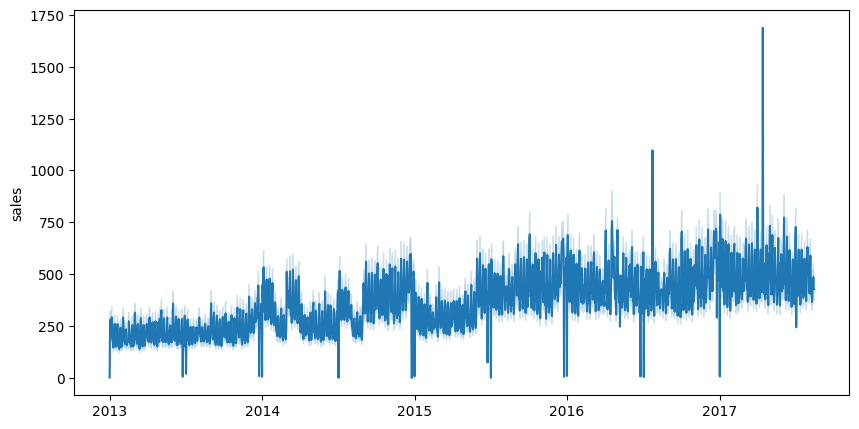

In [114]:
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_train.index,y=clean_train['sales'])

In [115]:
# take the first Differencing
# Fill missing data with 1

clean_train['sales_diff'] = clean_train['sales'].diff().fillna(1)



In [116]:
# test stationarity of first differenced sales [sales_diff] using KPSS test

stats, p, lags, critical_values = kpss(clean_train['sales_diff'], 'ct')

print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical Values: {critical_values}')

if p < 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: 0.00047327781976866574
p-value: 0.1
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is Stationary


<Axes: ylabel='sales_diff'>

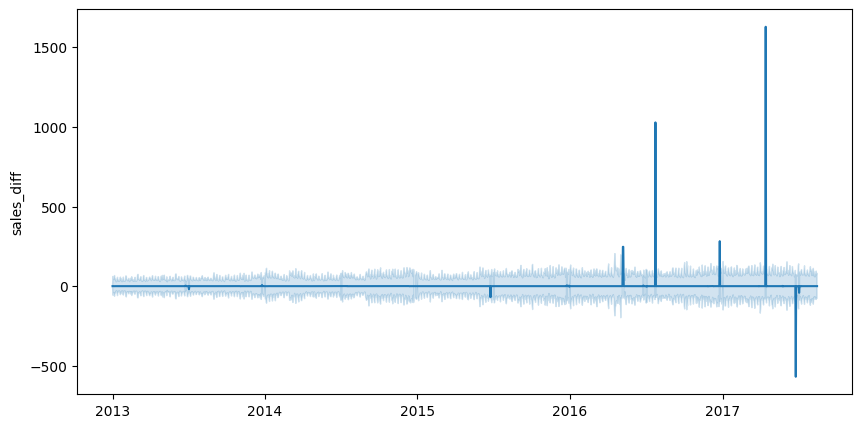

In [117]:
plt.figure(figsize=(10,5))
sns.lineplot(x=clean_train.index,y=clean_train['sales_diff'])

In [118]:
# Check if the index (date) is sorted before I split train and validation dataset
is_sorted = clean_train['sales_diff'].index.is_monotonic_increasing

# Print the result
if is_sorted:
    print("The index (date) is sorted.")
else:
    print("The index (date) is not sorted.")

The index (date) is sorted.


## Traditional Statistical Models

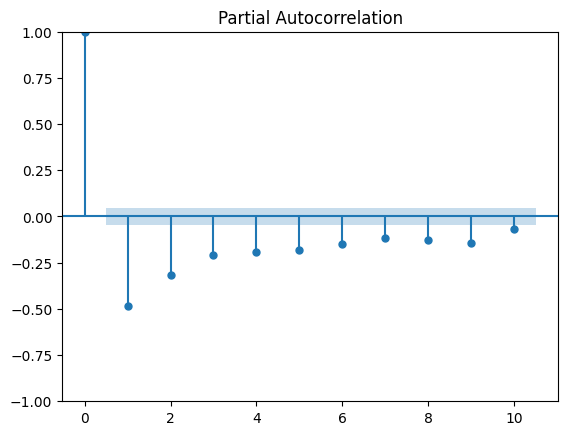

In [122]:
#pacf = plot_pacf(clean_train['sales_diff'],lags=10)

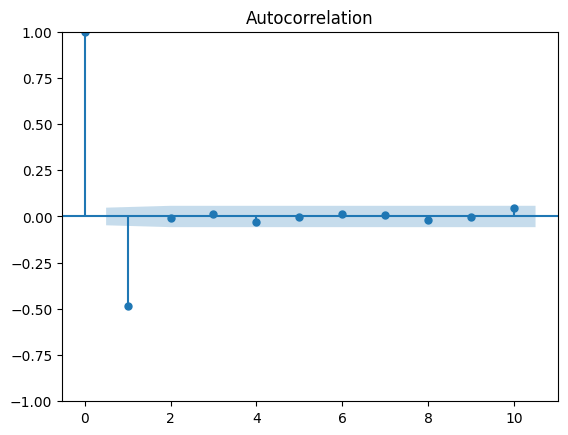

In [123]:
#acf = plot_acf(clean_train['sales_diff'], lags=5)

In [119]:
# split clean_train into final_train and eval_train
# split clean_train with Datetime index

# Specify the date on which to split the clean_train dataset
# this will give us 15 days for evaluation dataset(eval_train) a date range of 2017-08-01 to 2017-08-15
# and the 'final_train' a date range of 2013-01-01 to 2017-07-31
split_date = '2017-07-31'

# Split the time series DataFrame
final_train = clean_train[clean_train.index <= split_date]
eval_train = clean_train[clean_train.index > split_date]


# Display the split DataFrames
print("Date range for final_train:")
print(final_train.index.min().date(), 'to', final_train.index.max().date())

print("\nDate range for eval_train:")
print(eval_train.index.min().date(), 'to', eval_train.index.max().date())

print("\nDate range for clean_test:")
print(clean_test.index.min().date(), 'to', clean_test.index.max().date())

Date range for final_train:
2013-01-01 to 2017-07-31

Date range for eval_train:
2017-08-01 to 2017-08-15

Date range for clean_test:
2017-08-16 to 2017-08-31


In [120]:
eval_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26730 entries, 2017-08-01 to 2017-08-15
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oil_prices           26730 non-null  float64
 1   store_nbr            26730 non-null  object 
 2   ProductCategory      26730 non-null  object 
 3   sales                26730 non-null  float64
 4   onpromotion          26730 non-null  object 
 5   IsHoliday            26730 non-null  object 
 6   Holiday_transferred  26730 non-null  bool   
 7   city                 26730 non-null  object 
 8   state                26730 non-null  object 
 9   type_y               26730 non-null  object 
 10  store_cluster        26730 non-null  int64  
 11  sales_diff           26730 non-null  float64
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 2.5+ MB


In [121]:
model_AR=AutoReg(final_train.sales_diff,lags=5).fit()
model_AR.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             sales_diff   No. Observations:              2965266
Model:                     AutoReg(5)   Log Likelihood           -25068624.666
Method:               Conditional MLE   S.D. of innovations           1135.883
Date:                Sun, 17 Sep 2023   AIC                       50137263.331
Time:                        13:41:15   BIC                       50137353.649
Sample:                             5   HQIC                      50137287.153
                              2965266                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.660      0.000      1.000      -1.293       1.293
sales_diff.L1    -0.9221      0.001  -1620.214      0.000      -0.923      -0.921
sales_diff.L2    -0.7922      0.001  -1070.217      0.000      -0.794      -0.791
sales_diff.L3    -0.6650      0.001   -851.259      0.000      -0.667      -0.664
sales_diff.L4    -0.4316      0.001   -583.091      0.000      -0.433      -0.430
sales_diff.L5    -0.1987      0.001   -349.147      0.000      -0.200      -0.198
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4579           -1.1973j            1.2818           -0.1919
AR.2            0.4579           +1.1973j            1.2818            0.1919
AR.3           -1.4151           -0.0000j            1.4151           -0.5000
AR.4           -0.8363           -1.2104j            1.4712           -0.3462
AR.5           -0.8363           +1.2104j            1.4712            0.3462
-----------------------------------------------------------------------------
"""

In [122]:
AR_pred=model_AR.predict(start=len(final_train),
                      end=len(final_train)+len(eval_train)-1,
                      dynamic=False                 
                      )

In [123]:
# Evaluate our models
mse=mean_squared_error(eval_train['sales_diff'], AR_pred)
msle = mean_squared_log_error( abs(eval_train['sales_diff']), abs(AR_pred)).round(2)
rmse=np.sqrt(mean_squared_error(eval_train['sales_diff'], AR_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error( abs(eval_train['sales_diff']), abs(AR_pred))).round(2)

results=pd.DataFrame([['AR', mse, msle, rmse, rmsle]], columns=['Model','MSE','MSLE','RMSE','RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,AR,3.247310e+06,27.86,1802.03,5.28


### ARIMA

In [124]:
stepwise_fit=auto_arima(final_train['sales_diff'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [129]:
from statsmodels.tsa.arima.model import ARIMA

In [131]:
model=ARIMA(final_train.sales_diff, order=(2,0,1))

In [132]:
model_fit=model.fit()

In [133]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             sales_diff   No. Observations:              2965266
Model:                 ARIMA(2, 0, 1)   Log Likelihood           -24945903.788
Date:                Sat, 16 Sep 2023   AIC                       49891817.575
Time:                        12:44:23   BIC                       49891882.088
Sample:                             0   HQIC                      49891834.591
                            - 2965266                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.019      0.012      0.990      -0.037       0.038
ar.L1         -0.0545      0.000   -338.392      0.000      -0.055      -0.054
ar.L2         -0.0256      0.000    -56.638      0.000      -0.027      -0.025
ma.L1         -0.9740   8.46e-05  -1.15e+04      0.000      -0.974      -0.974
sigma2      1.188e+06    131.641   9022.237      0.000    1.19e+06    1.19e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.78   Jarque-Bera (JB):        3757541685.16
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                             7.25
Prob(H) (two-sided):                  0.00   Kurtosis:                       176.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
ARIMA_pred=model_fit.predict(start=len(final_train),
                      end=len(final_train)+len(eval_train)-1,
                      dynamic=False                 
                      )

In [148]:
# Evaluate our models
mse=mean_squared_error(eval_train['sales_diff'], ARIMA_pred)
msle = mean_squared_log_error( abs(eval_train['sales_diff']), abs(ARIMA_pred)).round(2)
rmse=np.sqrt(mean_squared_error(eval_train['sales_diff'], ARIMA_pred)).round(2)
rmsle=np.sqrt(mean_squared_log_error( abs(eval_train['sales_diff']), abs(ARIMA_pred))).round(2)

ARIMA_results=pd.DataFrame([['ARIMA', mse, msle, rmse, rmsle]], columns=['Model','MSE','MSLE','RMSE','RMSLE'])
ARIMA_results


,Model,MSE,MSLE,RMSE,RMSLE
0,ARIMA,3.247378e+06,27.87,1802.05,5.28


### SARIMA

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [126]:
model_SA = SARIMAX(final_train.sales_diff, order=(2,0,1),seasonal_order=(1,1,1,12))


In [127]:
model_SA_fit=model_SA.fit()

KeyboardInterrupt: 

## Machine Learning Models
Modern machine learning models like decision trees, random forests, gradient boosting, and neural networks can be used for time series forecasting. These models can capture complex relationships in the data but may require more data and computational resources. 

In [ ]:
# Linear Regression
# Decision Tree
# 